# Central Tendency Measures for grouped data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Mean formula
$$
\text{ Sample mean: } \overline{x} \\
\text{ Population mean or mu: } \mu \\
\text{ observations number: n} \\
\overline{x}= \mu = \frac{\sum\limits_{i=1}^nX_{i}}{n} \\
$$
### Median formula for grouped data
(Take observation in the middle for odd observations number. For even observations number, take two observations in the middle and divide by two).
$$
\text{ Median definitions: } M, Med, \tilde{x}\\
\text{ For odd observations number: } \tilde{x} = (\frac{n+1}{2})th \text{ observation } \\
\text{ For even observations number: } \tilde{x} = (\frac{\frac{n}{2}+(\frac{n}{2}+1)}{2})th \text{ observation } \\
$$
### Mode - value of the most met observation(s). 
Important: multiple mode values are possible, f.e for observation set {0,1,1,2,3,4,4,5), 1 and 4 would be both mode values

In [156]:
def getMedian(observations):
    size = len(observations)
    sortedObservations = np.sort(observations)
    if (size % 2) == 0:
        index1 = int(size/2)
        index2 = index1 - 1
        return (sortedObservations[index1]+sortedObservations[index2])/2
    else:
        medianObservation = int((size+1)/2) -1
        return sortedObservations[medianObservation]

#not used, as does not match nicely with histogram bins
# I leave it here though as example of calculation
# def getMode(observations):
#     modes = []
#     groupFrequency = {}
#     for observation in observations:
#         group = round(observation,0)
#         if group in groupFrequency:
#             groupFrequency[group] = groupFrequency[group] + 1
#         else:
#             groupFrequency[group] = 1
#     maxValue = max(groupFrequency.values()) 
#     maxGroups = [k for k, v in groupFrequency.items() if v == maxValue]
#     return maxGroups

def getModeFromHistogram(bins, binRanges):
    maxValueIndexes = np.argwhere(bins == np.amax(bins))
    modes = []
    for index in np.nditer(maxValueIndexes):
        mode = (binRanges[index]+binRanges[index+1])/2
        modes.append(mode)
    return modes

def plotHistogram(mu, sigma, n, subplot, hasOutliers):
    np.random.seed(12)# So that graphics are the same at next call
    data = np.random.normal(mu,sigma, n)
    if hasOutliers:
        data = np.insert(data,0,-25)
        data = np.insert(data,1,-20)
    subplot.title.set_text("Sample size " +str(n))
    binData = subplot.hist(data, bins=10, alpha = 0.5)
    subplot.axvline(data.mean(), color='green', linewidth=2, ymin = 0, ymax = 0.3 )
    subplot.axvline(getMedian(data), color='red',linewidth=2, ymin = 0.35, ymax = 0.7)
    modes = getModeFromHistogram(binData[0], binData[1])
    for mode in modes:
        subplot.axvline(mode, color='black', linewidth=2, ymin = 0.75, ymax = 1)
    subplot.set_ylabel('Frequency')
#    subplot.set_xlabel('Value')
    subplot.legend(["Mean", "Median", "Mode"])

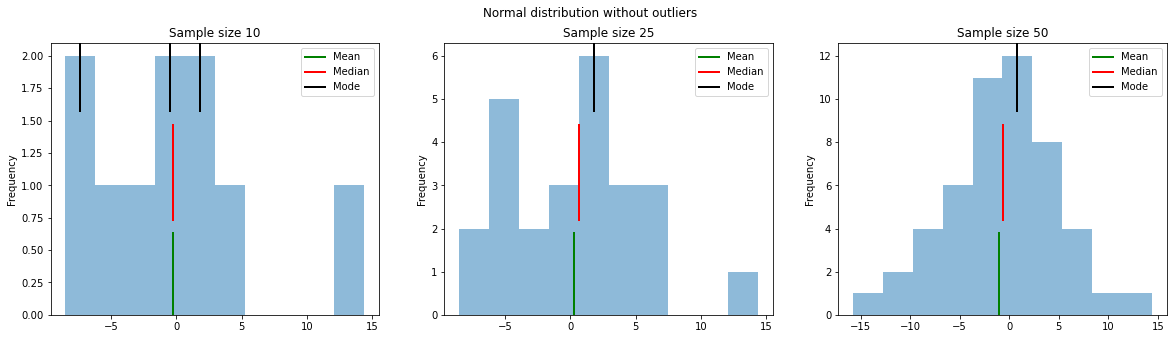

In [157]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
plt.suptitle("Normal distribution without outliers")
plotHistogram(0,5,10,ax[0], False)
plotHistogram(0,5,25,ax[1], False)
plotHistogram(0,5,50,ax[2], False)

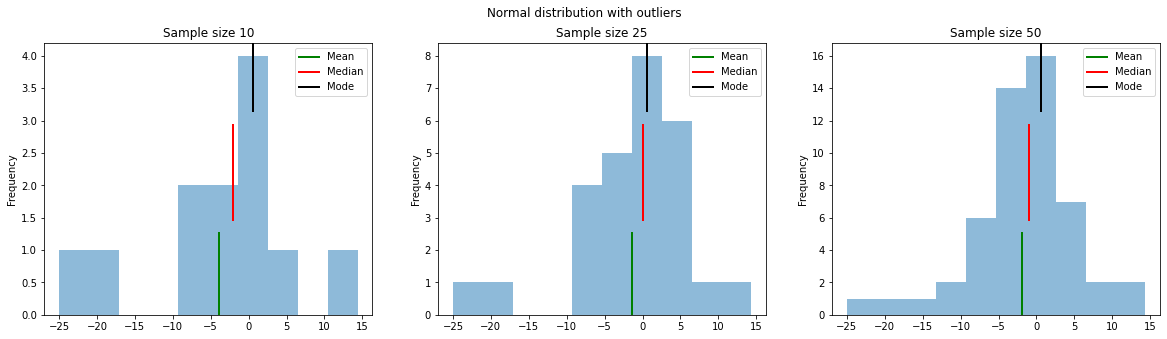

In [160]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
plt.suptitle("Normal distribution with outliers")
plotHistogram(0,5,10,ax[0], True)
plotHistogram(0,5,25,ax[1], True)
plotHistogram(0,5,50,ax[2], True)

## Outcome:
1. The distributions without outliers show no big difference between mean and median.
2. By adding outliers mean and median change noticeably, mean changes more.
3. Mode changes for graphics of 10 sample size, but it should be because of logic of bins calculation of histogram function.
4. Increasing sample size makes mean and median be less affected by two outliers given.